In [65]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup
from langdetect import detect, DetectorFactory

In [32]:
#genius api
genius_api_key = 'gQVkGL-wnevLS3t39UOjl1a9x3smebFPcMX6awdjS-61kw-NrQEQmWWDbNXzUWjz'
genius_url = 'https://api.genius.com'

In [ ]:
spotify_songs_csv = Path("Resources/spotify_most_streamed.csv")
spotify_songs_df = pd.read_csv(spotify_songs_csv)
spotify_songs_df.drop(columns=['released_month', 'released_day', 'in_spotify_playlists','in_spotify_charts',
                                'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
                                'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%','valence_%',
                                'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%','speechiness_%',
                                  'cover_url', 'artist_count'  ], inplace=True)
spotify_songs_df.head()

,track_name,artist(s)_name,released_year,streams
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,141381703
1,LALA,Myke Towers,2023,133716286
2,vampire,Olivia Rodrigo,2023,140003974
3,Cruel Summer,Taylor Swift,2019,800840817
4,WHERE SHE GOES,Bad Bunny,2023,303236322


In [43]:
spotify_songs_df['Lyrics URL'] = ''
spotify_songs_df['Lyrics'] = ''
spotify_songs_df['Language'] = ''
spotify_songs_df.head()

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,141381703,,,
1,LALA,Myke Towers,2023,133716286,,,
2,vampire,Olivia Rodrigo,2023,140003974,,,
3,Cruel Summer,Taylor Swift,2019,800840817,,,
4,WHERE SHE GOES,Bad Bunny,2023,303236322,,,


In [55]:
top_100_df = spotify_songs_df.sort_values(by='streams', ascending=False).head(100)
top_100_df = top_100_df[top_100_df['streams'].str.isdigit()]
top_100_df

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
33,Anti-Hero,Taylor Swift,2022,999748277,,,
625,Arcade,Duncan Laurence,2019,991336132,,,
253,Glimpse of Us,Joji,2022,988515741,,,
455,Seek & Destroy,SZA,2022,98709329,,,
98,Summertime Sadness,Lana Del Rey,2011,983637508,,,
...,...,...,...,...,...,...,...
608,Bored,Billie Eilish,2017,777765388,,,
528,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),"Julieta Venegas, Bad Bunny, Tainy",2021,775542072,,,
307,I Know - PR1SVX Edit,"Kanii, PR1ISVX",2023,77377503,,,
631,Blessed-Cursed,ENHYPEN,2022,77337771,,,


In [56]:
def search_genius(row):
    base_url = "https://api.genius.com/search"
    token = "gQVkGL-wnevLS3t39UOjl1a9x3smebFPcMX6awdjS-61kw-NrQEQmWWDbNXzUWjz"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    params = {
        "q": f"{row['track_name']}{row['artist(s)_name']}"
    }
    try:
        response = requests.get(base_url, headers=headers, params=params)
        response.raise_for_status()
        data = response.json()
        
        
        hits = data.get("response", {}).get("hits", [])
        if hits:
            return hits[0].get("result", {}).get("url", "No URL Found")
        else:
            return "No Results"
    except Exception as e:
        return f"Error: {e}"


top_100_df['Lyrics URL'] = top_100_df.apply(search_genius, axis=1)
top_100_df.head()

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
33,Anti-Hero,Taylor Swift,2022,999748277,https://genius.com/Taylor-swift-anti-hero-lyrics,,
625,Arcade,Duncan Laurence,2019,991336132,https://genius.com/Duncan-laurence-arcade-lyrics,,
253,Glimpse of Us,Joji,2022,988515741,https://genius.com/Joji-glimpse-of-us-lyrics,,
455,Seek & Destroy,SZA,2022,98709329,https://genius.com/Mc-eiht-all-day-everyday-ly...,,
98,Summertime Sadness,Lana Del Rey,2011,983637508,https://genius.com/Lana-del-rey-summertime-sad...,,


In [57]:
def scrape_lyrics(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        lyrics_container = soup.find('div', class_='Lyrics__Container-sc-1ynbvzw-1 kUgSbL')
        if lyrics_container:
            return lyrics_container.get_text(separator="\n").strip()
        return "Lyrics not found"
    except Exception as e:
        return f"Error: {e}"

top_100_df['Lyrics'] = top_100_df['Lyrics URL'].apply(scrape_lyrics)

In [58]:
top_100_df.head()

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
33,Anti-Hero,Taylor Swift,2022,999748277,https://genius.com/Taylor-swift-anti-hero-lyrics,[Verse 1]\nI have this thing where I get older...,
625,Arcade,Duncan Laurence,2019,991336132,https://genius.com/Duncan-laurence-arcade-lyrics,[Verse 1]\nA broken heart is all that's left\n...,
253,Glimpse of Us,Joji,2022,988515741,https://genius.com/Joji-glimpse-of-us-lyrics,[Verse 1]\nShe'd take the world off my shoulde...,
455,Seek & Destroy,SZA,2022,98709329,https://genius.com/Mc-eiht-all-day-everyday-ly...,Geah\nCompton\nFor the millenium\nHalf Ounce (...,
98,Summertime Sadness,Lana Del Rey,2011,983637508,https://genius.com/Lana-del-rey-summertime-sad...,[Chorus]\nKiss me hard before you go\nSummerti...,


In [ ]:
DetectorFactory.seed = 0

def detect_language(lyrics):
    try:
        return detect(lyrics)
    except Exception as e:
        return f"Error: {e}"

top_100_df['Language'] = top_100_df['Lyrics'].apply(detect_language)
top_100_df.head()

,track_name,artist(s)_name,released_year,streams,Lyrics URL,Lyrics,Language
33,Anti-Hero,Taylor Swift,2022,999748277,https://genius.com/Taylor-swift-anti-hero-lyrics,[Verse 1]\nI have this thing where I get older...,en
625,Arcade,Duncan Laurence,2019,991336132,https://genius.com/Duncan-laurence-arcade-lyrics,[Verse 1]\nA broken heart is all that's left\n...,en
253,Glimpse of Us,Joji,2022,988515741,https://genius.com/Joji-glimpse-of-us-lyrics,[Verse 1]\nShe'd take the world off my shoulde...,en
455,Seek & Destroy,SZA,2022,98709329,https://genius.com/Mc-eiht-all-day-everyday-ly...,Geah\nCompton\nFor the millenium\nHalf Ounce (...,en
98,Summertime Sadness,Lana Del Rey,2011,983637508,https://genius.com/Lana-del-rey-summertime-sad...,[Chorus]\nKiss me hard before you go\nSummerti...,en


In [60]:
unique_language = top_100_df['Language'].unique()
print(unique_language)

['en' 'es' 'id' 'ko']


In [62]:
language_count = top_100_df['Language'].value_counts()
print(language_count)

Language
en    88
es     9
id     1
ko     1
Name: count, dtype: int64


In [68]:
language = ['English', 'Spanish', 'Indonesian', 'Korean']
language_appearance = [88, 9, 1, 1]
#explode = (0.1,0,0,0)

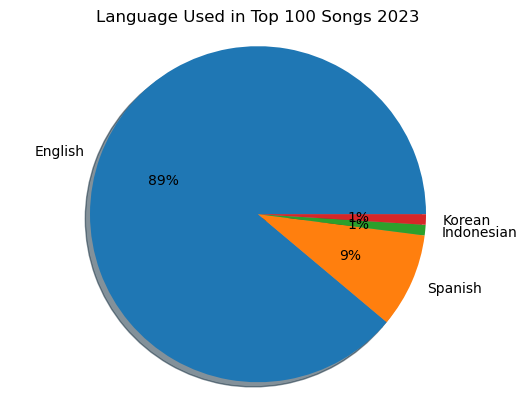

In [78]:
plt.pie(language_appearance, labels=language, autopct="%1.0f%%", shadow=True, startangle=0);
plt.axis("equal");
plt.title('Language Used in Top 100 Songs 2023');
